# Lab Five: Evaluation and Multi-Layer Perceptron
Group member:


## Preparation and Overview
1.1 Explain the task and what business-case or use-case it is designed to solve (or designed to investigate). Detail exactly what the task is and what parties would be interested in the results. How well would your prediction algorithm need to perform to be considered useful by interested parties?

For manufacturers in steel industries, producing defected products means loss of benefits. If they can find a way to figure out the steel plates faults, they will be able to locate the exact problems that defect their product. Traditional ways to do determination of steel plates faults includes scratching part of products and test it in laboratories, but this cost so much money. Steel plates faults may be the result of problematic production lines, and once we find out the class of certain steel plates faults, we can go back to the blueprint of production line and adjust it. As a manufacturer, this is a much better alternative than laboratory method, because classification by table data cost much less. 

What we want to do here is to determine steel plates faults with 27 independent attributes of steel plates. And steel plates faults will be classified to 7 distinct classes. The 7 classes are Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, and Other_Faults.

Steel is primary raw material for various industries, and Medical Industry has high demand for high quality steel. Obviously people cannot endure dcotors use scalpels with stains to do surgery. Craftmen need to polish the instruments to make them gain resistance to corrosion.(http://www.teleflex.com/en/usa/pdf/KMedic_Surgical_Instruments_101.pdf) Craftmen really want their raw material as clean as possible, so that they don't have to waste much time on preprocessing steel plates.

Our target parties will be Medical Companies which produce medical instruments. For these companies, accuracy and precision of our algorithm will be the first parameter they will consider in the first place. Obviously 100% accurate will be our expectation, but when we come back to reality, an accuracy higher than 90% will be enough for them to enhance their efficiency in medical instrument production.

In [4]:
import pandas as pd
import numpy as np
col_names = open('Faults27x7_var.txt', 'r').read().split('\n')[0:34]
steel = pd.read_csv('Faults.txt', sep ='\t', header=None)
steel = steel.as_matrix()
steel_com = pd.DataFrame(steel,columns = col_names)
steel_com

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,0.8182,-0.2913,0.5822,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,0.7931,-0.1756,0.2984,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,0.6667,-0.1228,0.2150,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,0.8444,-0.1568,0.5212,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,0.9338,-0.1992,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,430.0,441.0,100250.0,100337.0,630.0,20.0,87.0,62357.0,64.0,127.0,...,0.8736,-0.2267,0.9874,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,413.0,446.0,138468.0,138883.0,9052.0,230.0,432.0,1481991.0,23.0,199.0,...,0.9205,0.2791,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,190.0,200.0,210936.0,210956.0,132.0,11.0,20.0,20007.0,124.0,172.0,...,0.5000,0.1841,0.3359,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,330.0,343.0,429227.0,429253.0,264.0,15.0,26.0,29748.0,53.0,148.0,...,0.5000,-0.1197,0.5593,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,74.0,90.0,779144.0,779308.0,1506.0,46.0,167.0,180215.0,53.0,143.0,...,0.9024,-0.0651,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
steel_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
X_Minimum                1941 non-null float64
X_Maximum                1941 non-null float64
Y_Minimum                1941 non-null float64
Y_Maximum                1941 non-null float64
Pixels_Areas             1941 non-null float64
X_Perimeter              1941 non-null float64
Y_Perimeter              1941 non-null float64
Sum_of_Luminosity        1941 non-null float64
Minimum_of_Luminosity    1941 non-null float64
Maximum_of_Luminosity    1941 non-null float64
Length_of_Conveyer       1941 non-null float64
TypeOfSteel_A300         1941 non-null float64
TypeOfSteel_A400         1941 non-null float64
Steel_Plate_Thickness    1941 non-null float64
Edges_Index              1941 non-null float64
Empty_Index              1941 non-null float64
Square_Index             1941 non-null float64
Outside_X_Index          1941 non-null float64
Edges_X_Index            1941 non-null float64


#### Now we are going to pre-process our dataset to apply dimentionality reduction.

In [6]:
steel_com['TypeOfSteel_A300']=steel_com['TypeOfSteel_A300'].astype(np.int64)
steel_com['TypeOfSteel_A400']=steel_com['TypeOfSteel_A400'].astype(np.int64)
steel_com["Pastry"]=steel_com["Pastry"].astype(np.int64)
steel_com["Z_Scratch"]=steel_com["Z_Scratch"].astype(np.int64)
steel_com["K_Scatch"]=steel_com["K_Scatch"].astype(np.int64)
steel_com["Stains"]=steel_com["Stains"].astype(np.int64)
steel_com["Dirtiness"]=steel_com["Dirtiness"].astype(np.int64)
steel_com["Bumps"]=steel_com["Bumps"].astype(np.int64)
steel_com["Other_Faults"]=steel_com["Other_Faults"].astype(np.int64)

In [7]:
steel_op = steel_com
tempdata = []
for index, row in steel_op.iterrows():
    if row['Pastry'] == 1:
        tempdata.append(0)
    elif row['Z_Scratch'] == 1:
        tempdata.append(1)
    elif row['K_Scatch'] == 1:
        tempdata.append(2)
    elif row['Stains'] == 1:
        tempdata.append(3)
    elif row['Dirtiness'] ==1:
        tempdata.append(4)
    elif row['Bumps'] == 1:
        tempdata.append(5)
    else:
        tempdata.append(6)
steel_op['FaultsType'] = tempdata
faults_name = ["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]
steel_op.drop(faults_name, axis=1,inplace=True)
steel_op

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,FaultsType
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0
5,430.0,441.0,100250.0,100337.0,630.0,20.0,87.0,62357.0,64.0,127.0,...,0.5500,1.0000,1.0,2.7993,1.0414,1.9395,0.8736,-0.2267,0.9874,0
6,413.0,446.0,138468.0,138883.0,9052.0,230.0,432.0,1481991.0,23.0,199.0,...,0.1435,0.9607,1.0,3.9567,1.5185,2.6181,0.9205,0.2791,1.0000,0
7,190.0,200.0,210936.0,210956.0,132.0,11.0,20.0,20007.0,124.0,172.0,...,0.9091,1.0000,1.0,2.1206,1.0000,1.3010,0.5000,0.1841,0.3359,0
8,330.0,343.0,429227.0,429253.0,264.0,15.0,26.0,29748.0,53.0,148.0,...,0.8667,1.0000,1.0,2.4216,1.1139,1.4150,0.5000,-0.1197,0.5593,0
9,74.0,90.0,779144.0,779308.0,1506.0,46.0,167.0,180215.0,53.0,143.0,...,0.3478,0.9820,1.0,3.1778,1.2041,2.2148,0.9024,-0.0651,1.0000,0


In [196]:
idx = []
for index in range(0,27):
    if steel_op.dtypes.values[index] == 'float64':
        idx.append(index)
# grap the features that of numeric type
numeric_features = np.asarray(idx)
steel_part = steel_op.values[:,numeric_features]

In [197]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(steel_part)
# y = steel_com.values[:,27]
target_names = faults_name

pca = PCA(n_components=23)
X_pca = pca.fit(X).transform(X) # fit data and then transform it

# print the components

print ('pca:', pca.components_)

pca: [[ -3.02744282e-01  -2.49950529e-01   1.29370326e-02   1.29402361e-02
    2.49206629e-02   1.81364125e-02   5.79338706e-03   3.59224919e-02
   -1.01276395e-01   1.40969123e-02  -1.45096390e-01  -1.03716646e-01
   -1.77814734e-01   1.01971512e-01  -4.67371377e-02   7.41780599e-02
   -1.76683154e-02  -3.36138886e-01  -5.58179780e-01   1.77787463e-01
    2.44194850e-01   6.31989080e-02  -2.84153825e-01   1.54133704e-03
    3.87875677e-01]
 [ -1.92108774e-01  -1.79080272e-01  -1.59656728e-02  -1.59569989e-02
    1.78775663e-02   1.43043400e-02   8.21178512e-03   2.52418616e-02
   -1.09421753e-01  -2.32399851e-02  -6.27023160e-02   4.30141084e-02
   -2.14961361e-01   6.58700559e-02  -1.68942290e-01   1.79236174e-02
   -3.62543523e-01  -5.96641645e-03   5.89632096e-01   1.70445230e-01
    7.12982683e-02   1.60105501e-01   2.99050163e-01  -3.95038313e-02
    4.49089488e-01]
 [  5.79557764e-01   6.02331898e-01   3.30917175e-02   3.30949859e-02
    8.63199600e-03   7.80530235e-03   3.54463

In [198]:
pca = PCA(n_components=10)
X_pca = pca.fit(X).transform(X)
new_column_name = ["p1","p2","p3","p4","p5","p6","p7","p8","p9","p10"]
steel_new = pd.DataFrame(X_pca,columns=new_column_name)

In [199]:
y = steel_com.values[:,27]
y.shape

(1941,)

In [200]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.set(style="darkgrid") # one of the many styles to plot using
steel_mat = steel_new.copy()
steel_mat['FlautTypes'] = y.astype(np.int64)

#f, ax = plt.subplots(figsize=(9, 9))

#sns.heatmap(steel_mat.corr(), cmap=cmap, annot=True)

#f.tight_layout()

In [201]:
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
        tmp_array.append(tmp_string)
    return tmp_array

In [202]:
pca.components_.shape
pca_weight_strings = get_feature_names_from_weights(pca.components_,steel_op.columns[numeric_features])
for idx in range(0,10):
    print(new_column_name[idx], ': ',pca_weight_strings[idx])

p1 :  -0.30*X_Mi -0.25*X_Ma +0.01*Y_Mi +0.01*Y_Ma +0.02*Pixels_ +0.02*X_Peri +0.01*Y_Peri +0.04*Sum_of_Lumin -0.10*Minimum_of_Lumin +0.01*Maximum_of_Lumin -0.15*Length_of_Con -0.10*Steel_Plate_Thic -0.18*Edges_ +0.10*Empty_ -0.05*Square_ +0.07*Outside_X_ -0.02*Edges_X_ -0.34*Edges_Y_ -0.56*Outside_Global_ +0.18*LogOf +0.24*Log_X_ +0.06*Log_Y_ -0.28*Orientation_ +0.00*Luminosity_ +0.39*SigmoidOf 
p2 :  -0.19*X_Mi -0.18*X_Ma -0.02*Y_Mi -0.02*Y_Ma +0.02*Pixels_ +0.01*X_Peri +0.01*Y_Peri +0.03*Sum_of_Lumin -0.11*Minimum_of_Lumin -0.02*Maximum_of_Lumin -0.06*Length_of_Con +0.04*Steel_Plate_Thic -0.21*Edges_ +0.07*Empty_ -0.17*Square_ +0.02*Outside_X_ -0.36*Edges_X_ -0.01*Edges_Y_ +0.59*Outside_Global_ +0.17*LogOf +0.07*Log_X_ +0.16*Log_Y_ +0.30*Orientation_ -0.04*Luminosity_ +0.45*SigmoidOf 
p3 :  0.58*X_Mi +0.60*X_Ma +0.03*Y_Mi +0.03*Y_Ma +0.01*Pixels_ +0.01*X_Peri +0.00*Y_Peri +0.01*Sum_of_Lumin -0.09*Minimum_of_Lumin -0.02*Maximum_of_Lumin +0.17*Length_of_Con +0.03*Steel_Plate_Thic -0.01

In [203]:
steel_new = steel_new.drop('p5', 1)
steel_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 9 columns):
p1     1941 non-null float64
p2     1941 non-null float64
p3     1941 non-null float64
p4     1941 non-null float64
p6     1941 non-null float64
p7     1941 non-null float64
p8     1941 non-null float64
p9     1941 non-null float64
p10    1941 non-null float64
dtypes: float64(9)
memory usage: 136.6 KB


In [204]:
steel_new.head(10)

,p1,p2,p3,p4,p6,p7,p8,p9,p10
0,-0.279130,0.627447,-0.341112,-0.264930,0.407224,0.196986,-0.076548,-0.241657,-0.108908
1,-0.726596,0.113495,-0.075386,0.282027,0.286628,0.330748,-0.070746,-0.128066,0.090619
2,-0.858020,-0.122730,-0.064149,0.429424,0.223652,0.196908,-0.151080,0.034513,0.038026
3,-0.691736,0.317240,0.099531,0.410867,0.097471,-0.433754,0.221768,0.392952,0.004874
4,-0.343551,0.826848,0.744466,-0.091512,-0.127956,-0.259215,0.190666,0.131505,-0.228166
5,-0.194333,0.679485,0.028219,0.437923,-0.039734,0.174487,-0.101031,-0.066417,-0.394171
6,-0.140311,0.950162,0.257335,0.326347,0.521489,0.011083,-0.062931,-0.173196,-0.047343
7,-0.488762,0.121411,-0.488438,-0.182855,0.438772,-0.024630,-0.199343,0.110979,0.147978
8,-0.421244,0.241274,-0.243172,-0.043599,0.531084,0.111674,-0.070513,0.214726,-0.148497
9,-0.042504,0.979286,-0.039479,-0.058258,0.528889,0.052240,0.069840,-0.125299,-0.027447


In [205]:
steel_new['TypeOdSteel_A400'] = steel_op['TypeOfSteel_A400'].astype(np.int64)
steel_new['FaultsType'] = steel_op['FaultsType'].astype(np.int64)
steel_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 11 columns):
p1                  1941 non-null float64
p2                  1941 non-null float64
p3                  1941 non-null float64
p4                  1941 non-null float64
p6                  1941 non-null float64
p7                  1941 non-null float64
p8                  1941 non-null float64
p9                  1941 non-null float64
p10                 1941 non-null float64
TypeOdSteel_A400    1941 non-null int64
FaultsType          1941 non-null int64
dtypes: float64(9), int64(2)
memory usage: 166.9 KB


### Description of The Final Dataset
(Fill in please)

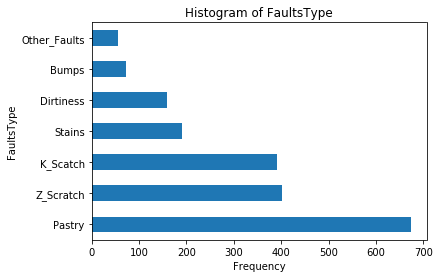

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = steel_op['FaultsType'].value_counts().plot(kind='barh')
plt.title('Histogram of FaultsType')
plt.xlabel('Frequency')
plt.ylabel('FaultsType')
plt.yticks([0,1,2,3,4,5,6],faults_name)
plt.show()

<h1>Selection of Metric</h1>
In this lab, we are going to use f1-score to evaluate our's algoritm's performance. f1-score seems like the most balanced metric to show the performance of our algorithm, because it is a weighted average of recall and precision. Classes in our dataset is not evenly distributed, while pastry is the fault that takes place in about 660 cases, and bumps only take less than 100 cases. So we need a metric that can represent their weight and show us their effects to the performance.

Additionally, higher f1-score mean lower false-negative and false positive, and it doesn't care about true negative. In our business case of Medical Industry, we really care about how many mistakes our algorithm makes, rather than how many successful predictions it makes. Because any mis-classification of fault type will cause extra time to fix it.

So we chose f1-score to evaluate our algorithm generalization performance.

<h1>Selection of Method to Separate Data</h1>
Obviously we are going to use stratified cross validation for dividing data into training and testing. Our classes are imbalanced as the disgram we've shown above. Keep the distribution of classes in each fold the same as the origin dataset will help us to make each fold representative enough to train our model. Compare to regular cross validation, stratified cross validation performances better in terms of bias and variance.

If we choose training and testing fold at random, then it be very likely to choose a fold filled with a single class, which is not representative enough to train our model.

In [206]:
X = steel_new.values[:,0:10]
y = steel_new['FaultsType']
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import accuracy_score
# predicted = cross_val_predict(LogisticRegression(), X, y, cv=10)
# accuracy_score(y, predicted) 

In [207]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
def split_data(X,y,test_port):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_port, random_state=0)
    print(X_train.shape)
    model1 = LogisticRegression()
    model1.fit(X_train, y_train)
    predicted = model1.predict(X_test)
    res = accuracy_score(y_test, predicted)
    model2 = LogisticRegression()
    model2.fit(X_train, y_train)
    res_train = accuracy_score(y_train, model2.predict(X_train))
    print('test portion split: ', test_port)
    print('accuaracy of train dataset:', res_train)
    print('predicted accuaracy of test dataset:', res)
#     res = cross_val_score(model2, X_train, y_train, scoring='accuracy', cv=10)
#     print('10-fold cross_val with on train set:',res.mean())
    return res,res_train

In [208]:
split_por = np.linspace(0.1, 0.4, num=50)
test = []
train = []
for ele in split_por:
    res,res_train = split_data(X,y,ele)
    test.append(res)
    train.append(res_train)


(1746, 10)
test portion split:  0.1
accuaracy of train dataset: 0.635166093929
predicted accuaracy of test dataset: 0.615384615385
(1735, 10)
test portion split:  0.10612244898
accuaracy of train dataset: 0.633429394813
predicted accuaracy of test dataset: 0.626213592233
(1723, 10)
test portion split:  0.112244897959
accuaracy of train dataset: 0.629715612304
predicted accuaracy of test dataset: 0.628440366972
(1711, 10)
test portion split:  0.118367346939
accuaracy of train dataset: 0.62828755114
predicted accuaracy of test dataset: 0.630434782609
(1699, 10)
test portion split:  0.124489795918
accuaracy of train dataset: 0.628605061801
predicted accuaracy of test dataset: 0.628099173554
(1687, 10)
test portion split:  0.130612244898
accuaracy of train dataset: 0.627741553053
predicted accuaracy of test dataset: 0.633858267717
(1675, 10)
test portion split:  0.136734693878
accuaracy of train dataset: 0.631044776119
predicted accuaracy of test dataset: 0.631578947368
(1663, 10)
test por

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.36, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1242, 10)
(699, 10)


In [210]:
import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None, firstLayer = "sigmoid", costfunc = "quadratic"):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.firstLayer = firstLayer
        self.costfunc = "quadratic"
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(self, z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        if self.firstLayer == "sigmoid":
            return expit(z)
        elif self.firstLayer == "linear":
            return z
        else:
            return expit(z)
            
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    

In [211]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = self._add_bias_unit(X, how='column')
        Z1 = W1 @ A1.T
        A2 = self._sigmoid(self, Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(self, Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # backpropagation
        grad1 = np.zeros(W1.shape)
        grad2 = np.zeros(W2.shape)
        
        # for each instance's activations
        for (a1,a2,a3,y) in zip(A1,A2.T,A3.T,Y_enc.T):
            dJ_dz2 = -2*(y - a3)*a3*(1-a3)
            dJ_dz1 = dJ_dz2 @ W2 @ np.diag(a2*(1-a2))
                         
            grad2 += dJ_dz2[:,np.newaxis]  @ a2[np.newaxis,:]
            grad1 += dJ_dz1[1:,np.newaxis] @ a1[np.newaxis,:] 
            # don't incorporate bias term in the z1 gradient 
            # (its added in a2 from another layer)
            

        # regularize weights that are not bias terms
        grad1[:, 1:] += (W1[:, 1:] * self.l2_C)
        grad2[:, 1:] += (W2[:, 1:] * self.l2_C)

        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * grad1
            self.W2 -= self.eta * grad2
            

        return self

In [212]:
params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              firstLayer = "sigmoid",
              costfunc = "cross")

In [213]:
%%time 
nn = TwoLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=1)
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

Epoch: 200/200

Test acc: 0.59799713877
CPU times: user 29 s, sys: 668 ms, total: 29.7 s
Wall time: 7.52 s


In [214]:
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        if self.costfunc == "quadratic":
            sigma2 = -2*(Y_enc-A3)*A3*(1-A3)
        else:
            sigma2 = (A3-Y_enc)
        grad2 = sigma2 @ A2.T
        
        sigma1 = (W2.T @ sigma2)*A2*(1-A2)
        grad1 = sigma1[1:,:] @ A1
        
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2

In [215]:
%%time
params['epochs'] = 500
nn = TwoLayerPerceptronVectorized(**params)

nn.fit(X_train, y_train, print_progress=5)
yhat = nn.predict(X_test)
print('Accuracy:',accuracy_score(y_test,yhat))

Epoch: 500/500

Accuracy: 0.638054363376
CPU times: user 3.72 s, sys: 164 ms, total: 3.88 s
Wall time: 1 s
